In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from task1_utils import generateDataVectors,forward_pass,loss,getConfused,getErrorRate

In [3]:
features = ["SepalLenght",
            "SepalWidth",
            "PetalLenght",
            "PetalWidth",
            "Class"]

irisData = pd.read_csv("data/IrisData/iris.data", 
                   names=features)

# Take 30 first samples of each Class for training
train_data = irisData.groupby("Class").head(30)
test_data = irisData.drop(train_data.index)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

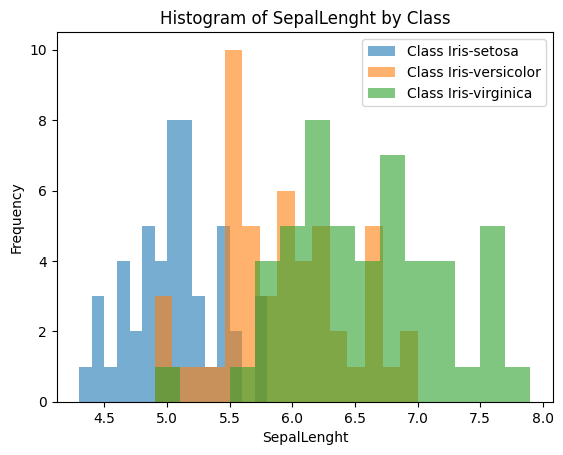

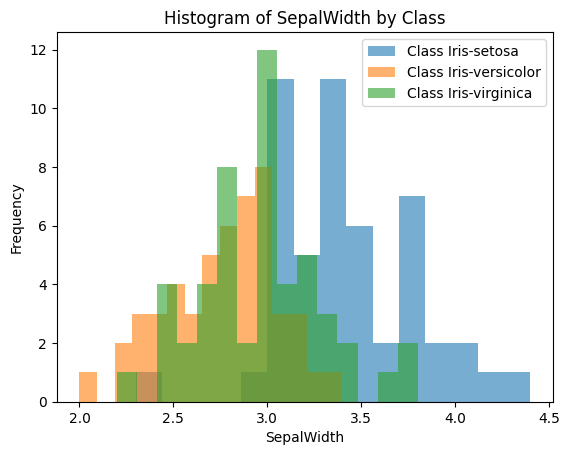

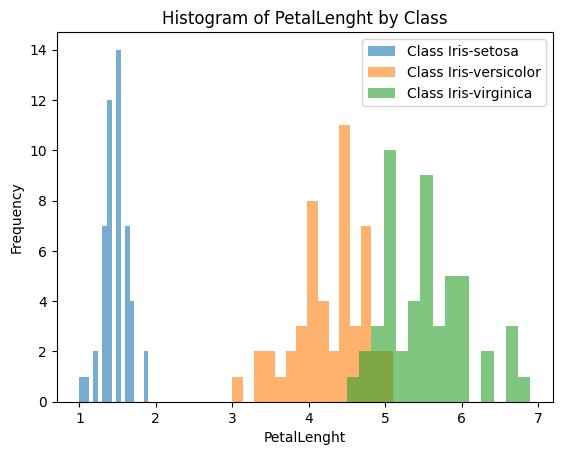

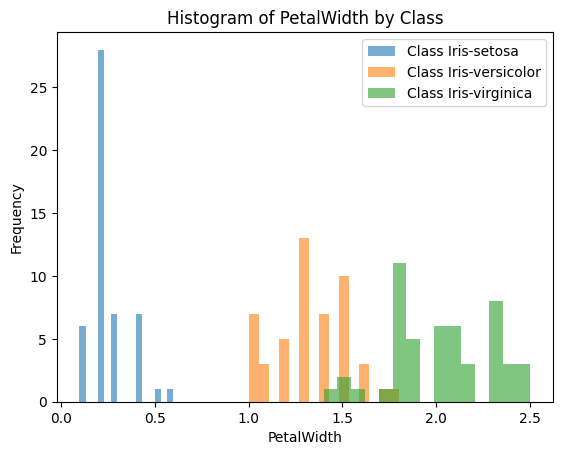

In [8]:
# Plot histogram by class
classes = irisData['Class'].unique()
for f_idx in range(4):
    plt.figure()
    for c in classes:
        subset = irisData[irisData['Class'] == c]
        plt.hist(subset[features[f_idx]], bins=15, alpha=0.6, label=f'Class {c}')

    plt.xlabel(f'{features[f_idx]}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {features[f_idx]} by Class')
    plt.legend()
    plt.show()